In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
%matplotlib inline


In [9]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Feature Descriptions
1. (age) age in years

2. (sex) sex (1 = male; 0 = female)

3. (cp) chest pain

4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)

5. (chol) serum cholestoral in mg/dl
6. (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. (restecg) resting electrocardiographic results
       -- Value 0: normal
       -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
            
8. (thalach) maximum heart rate achieved

9. (exang)  exercise induced angina (1 = yes; 0 = no)

10. (oldpeak) ST depression induced by exercise relative to rest

11. (slope) the slope of the peak exercise ST segment
            -- Value 1: upsloping
            -- Value 2: flat
            -- Value 3: downsloping
            
12. (ca) number of major vessels (0-3) colored by flourosopy

13. (thal) 1 = normal; 2 = fixed defect; 3 = reversable defect

14. (target) (the predicted attribute)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

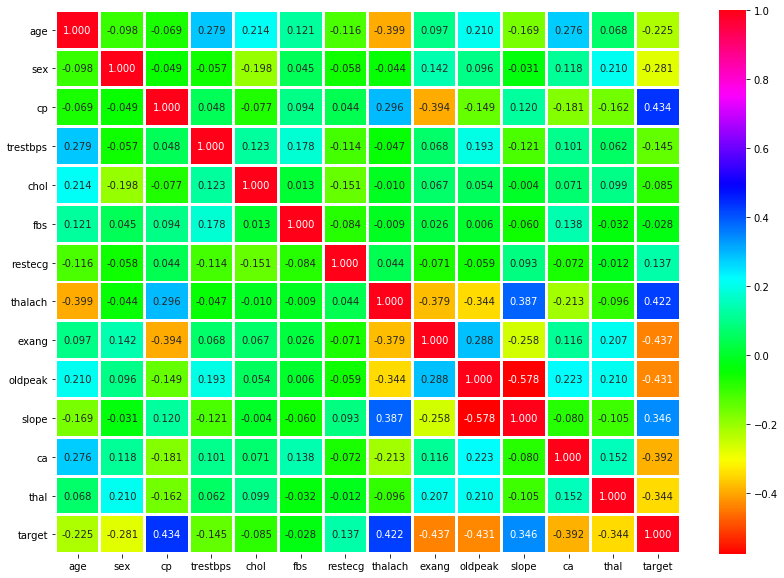

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

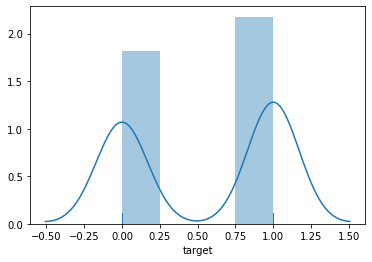

In [16]:
df.groupby('cp',as_index=False)['target'].mean()
df.groupby('slope',as_index=False)['target'].mean()
df.groupby('thal',as_index=False)['target'].mean()
df.groupby('target').mean()
sns.distplot(df['target'],rug=True)
plt.show()



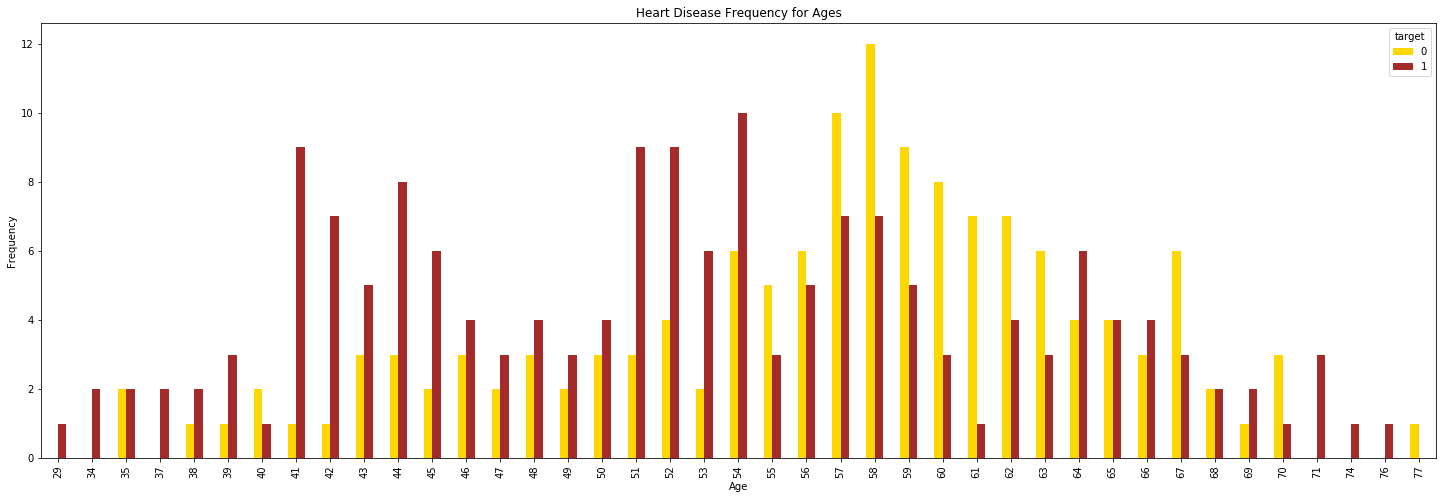

In [17]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

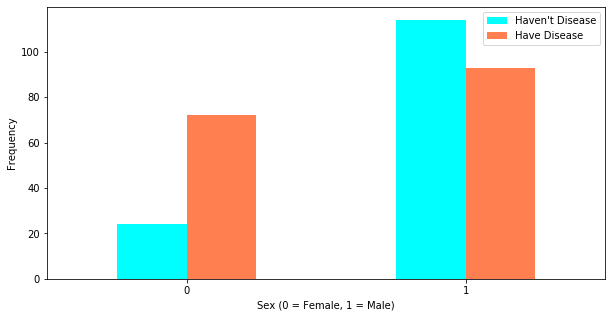

In [18]:

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Relation of tresbps with target')

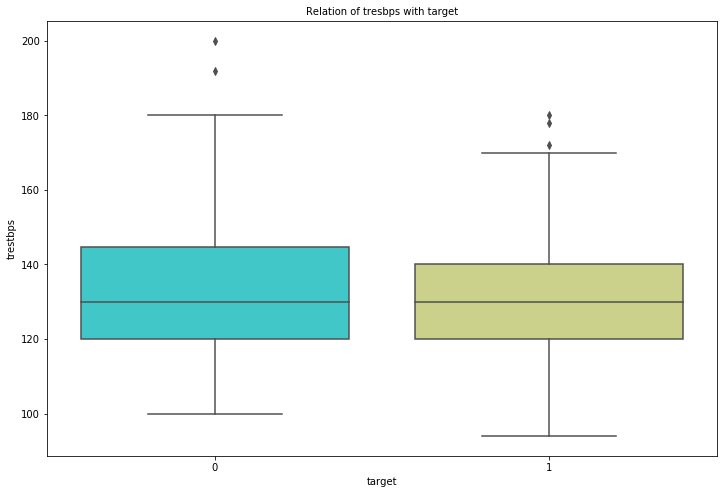

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(df['target'], df['trestbps'], palette = 'rainbow')
plt.title('Relation of tresbps with target', fontsize = 10)

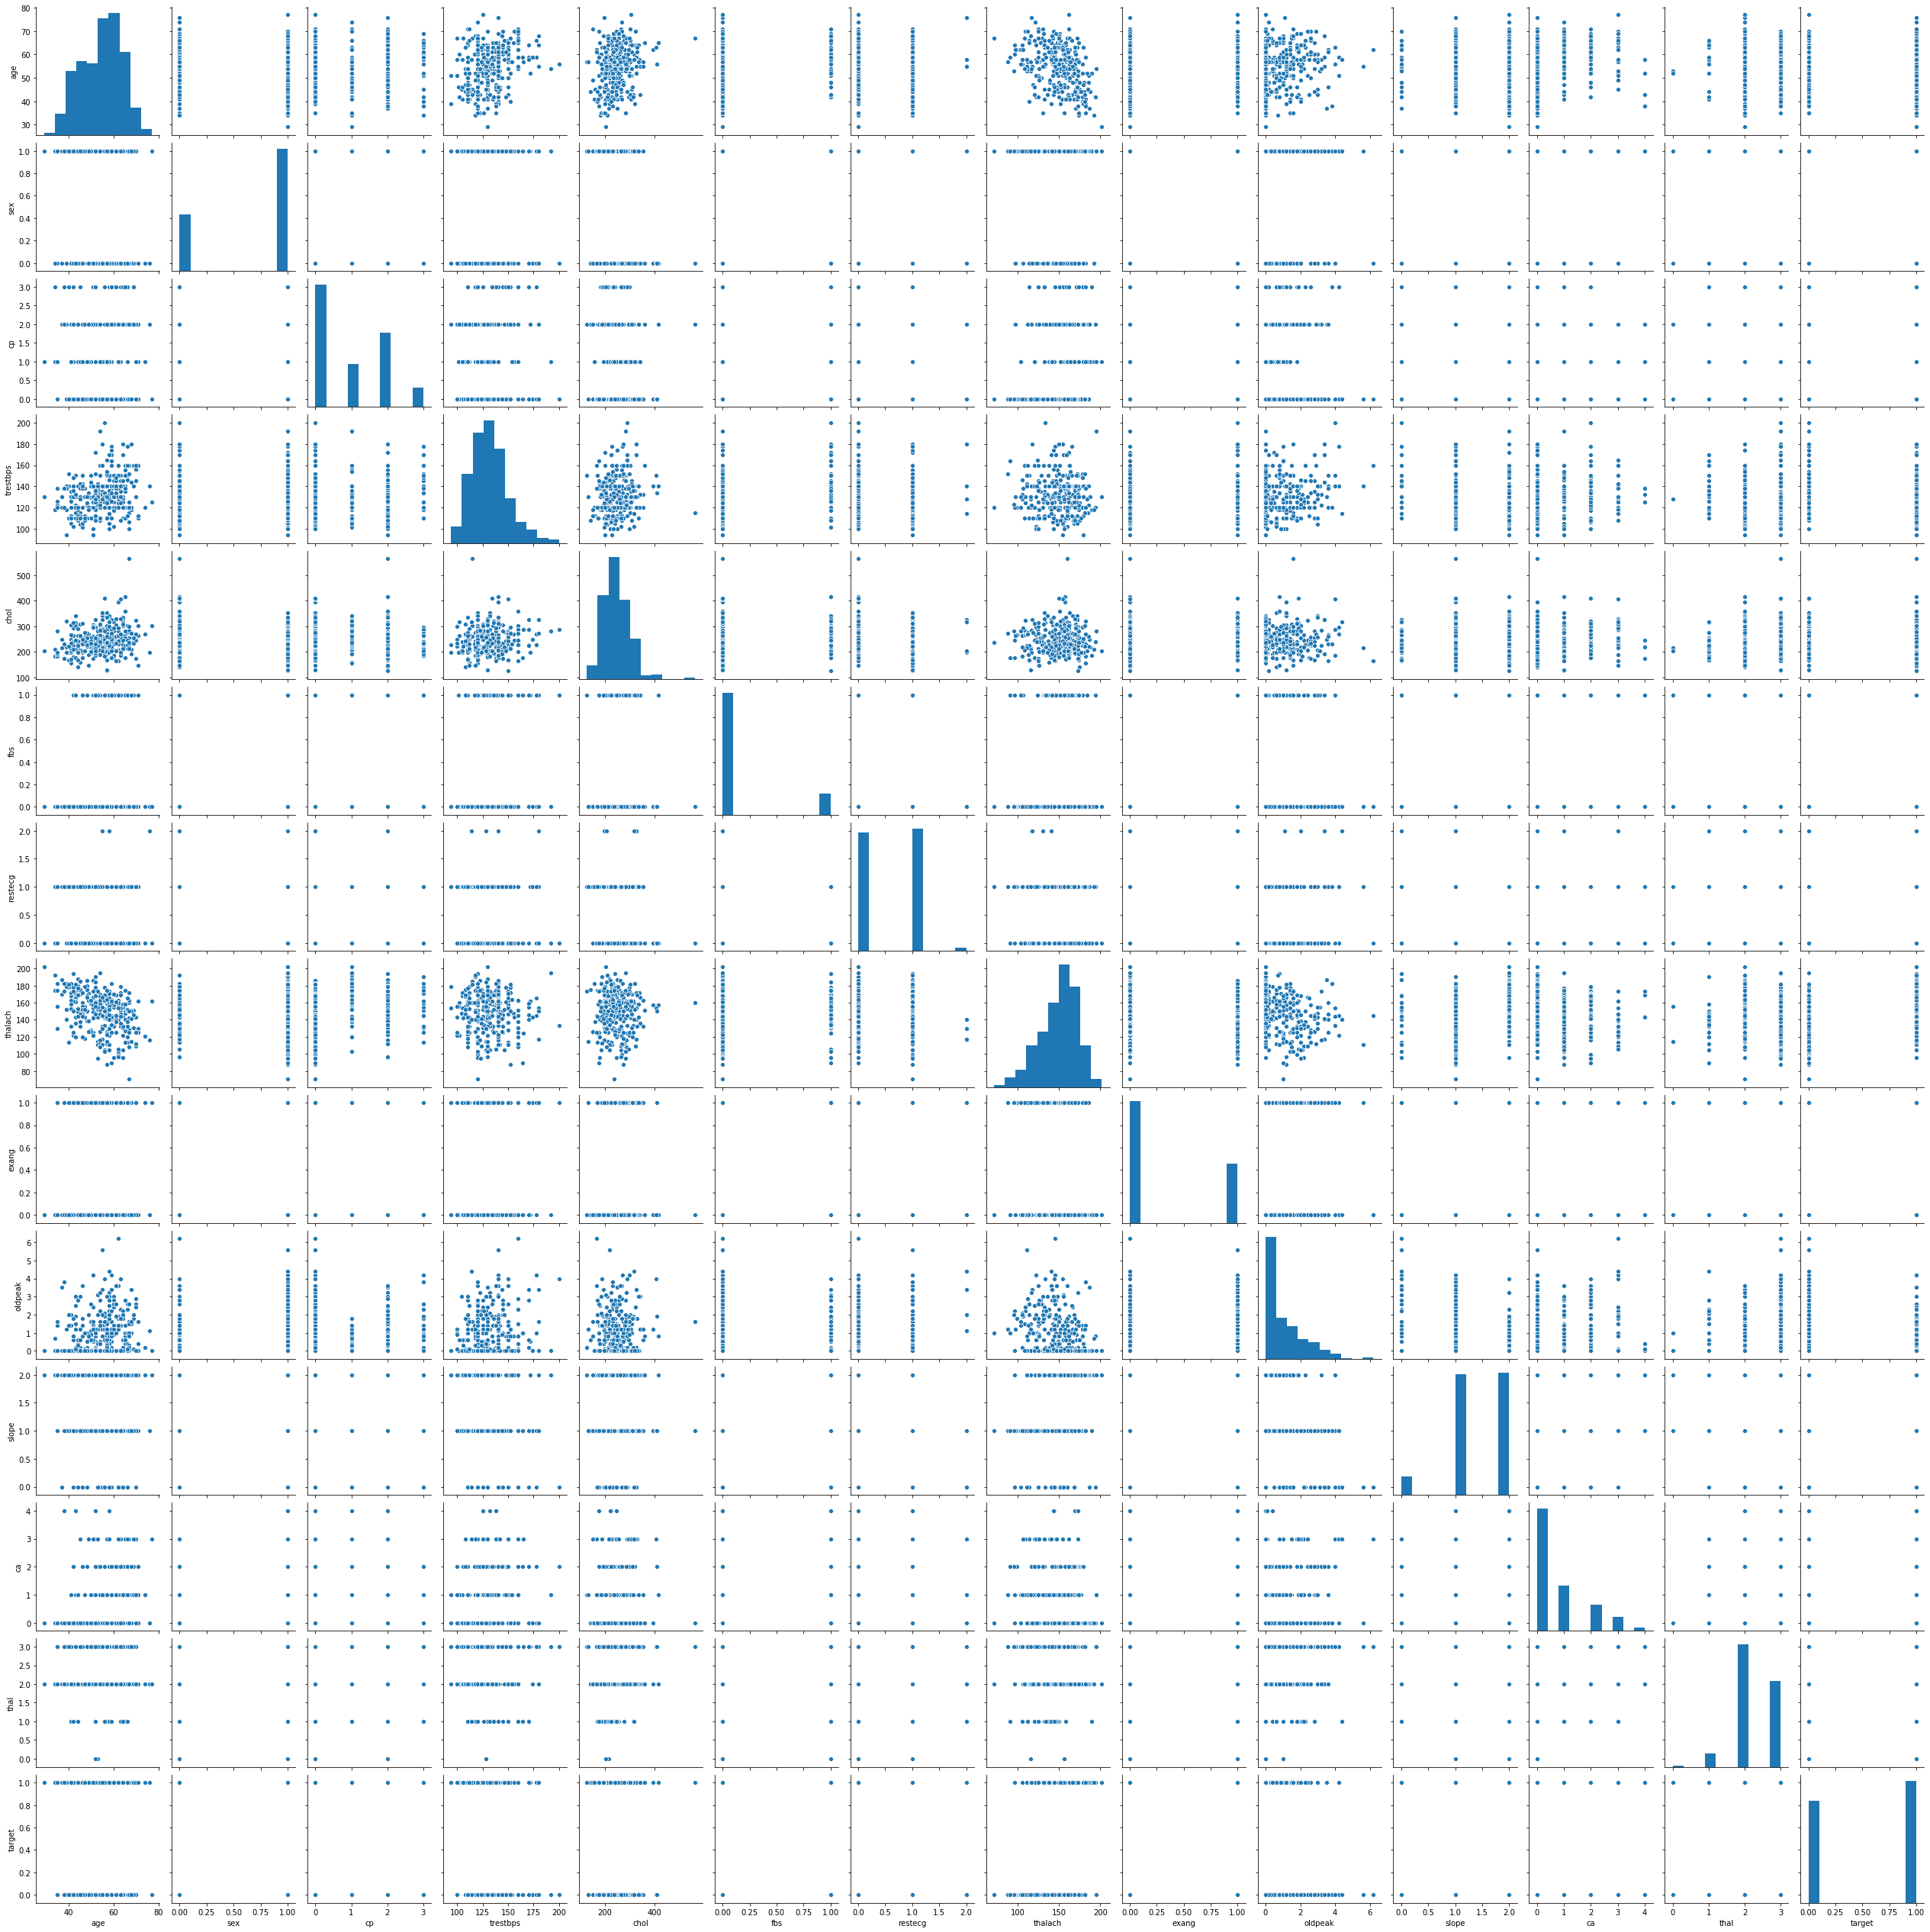

In [20]:
sns.pairplot(data=df)

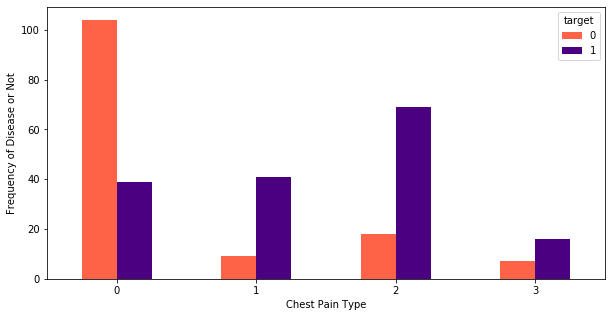

In [21]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

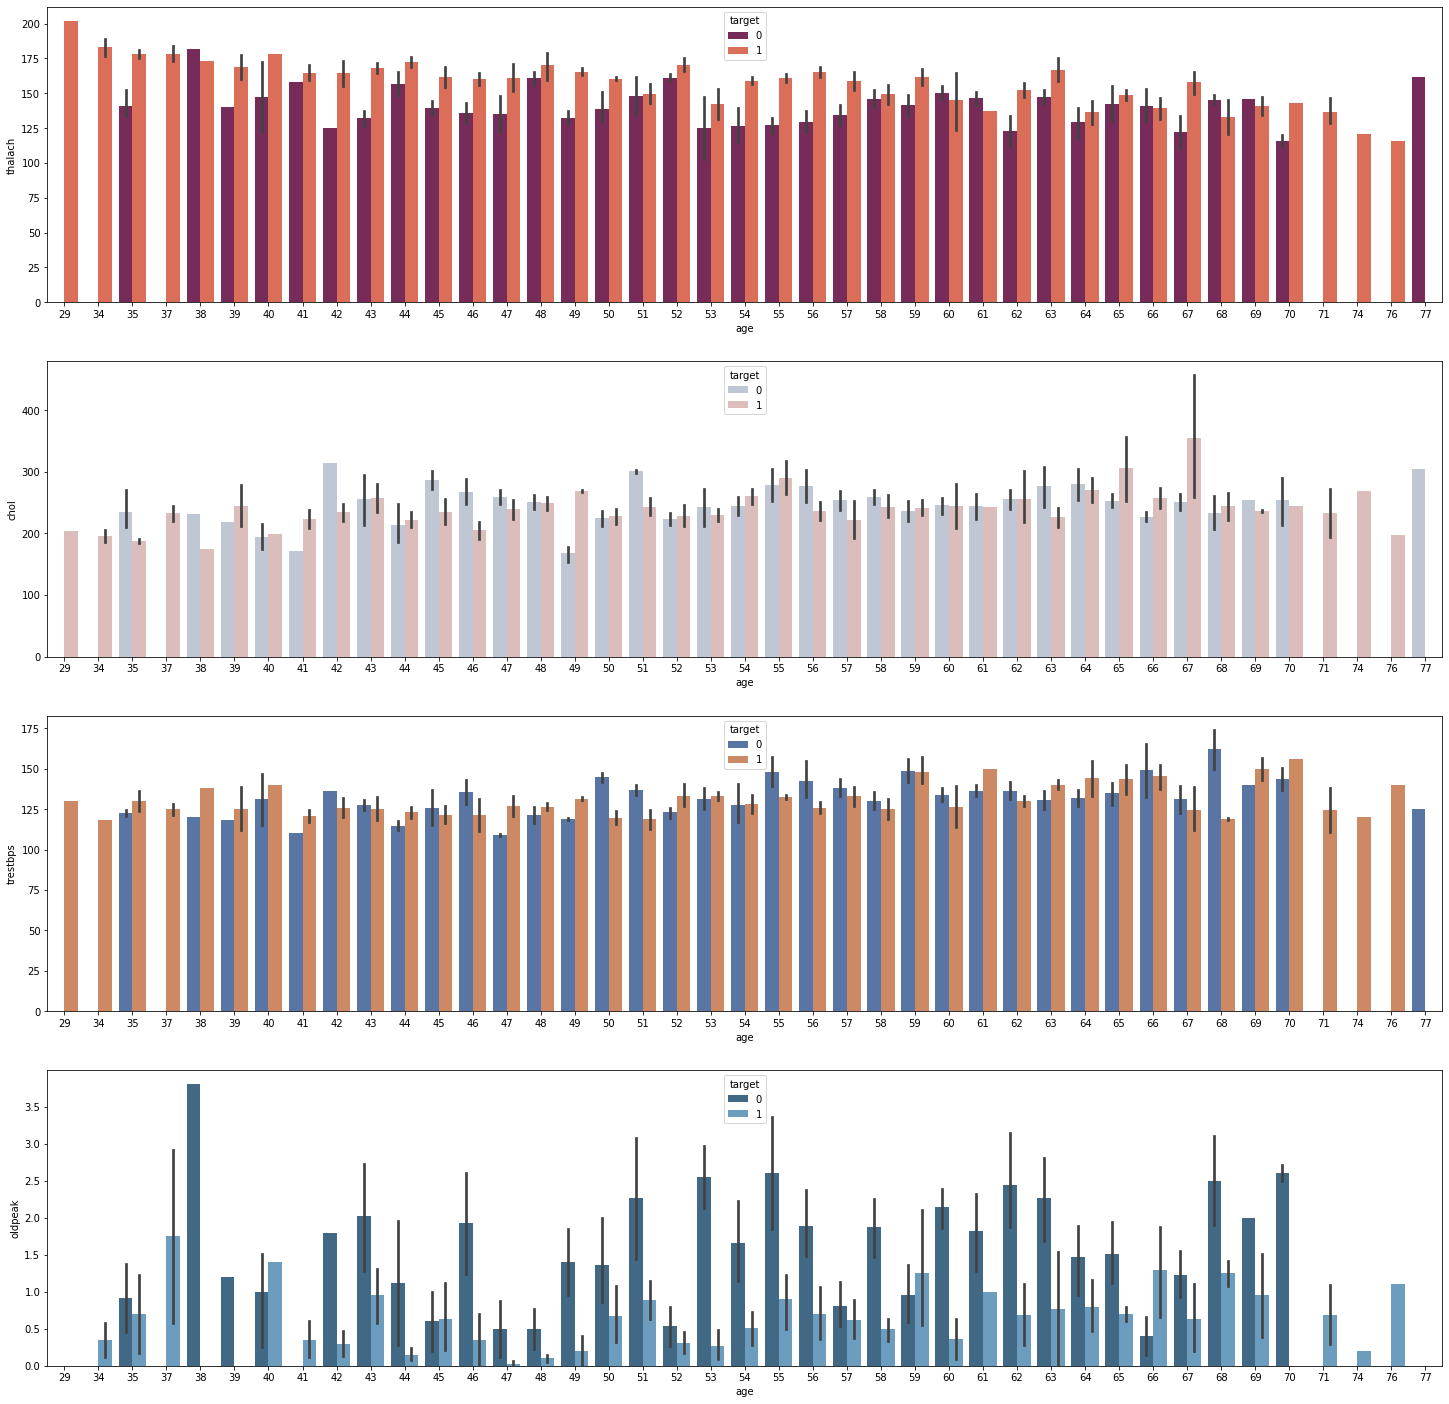

In [29]:
fig, ax = plt.subplots(4,1,figsize = (25,25))
sns.barplot(x = df.age, y = df.thalach, hue = df.target, palette="rocket", ax = ax[0])
sns.barplot(x = df.age, y = df.chol, hue = df.target, palette="vlag", ax = ax[1])
sns.barplot(x = df.age, y = df.trestbps, hue = df.target, palette="deep", ax = ax[2])
sns.barplot(x = df.age, y = df.oldpeak, hue = df.target, palette="Blues_d",ax = ax[3])

In [35]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)
df.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,1,0,0,0,1,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,1,0,0,0,0,0,1,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,0,1,0,0,1,0


In [37]:

X = df.drop(['target'], axis = 1)
y = df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 11, activation = 'relu', input_dim = 22))

# Adding the second hidden layer
classifier.add(Dense(units = 11, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1,  activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Train on 820 samples
Epoch 1/100
820/820 [==============================] - 1s 929us/sample - loss: 0.6429 - accuracy: 0.6378
Epoch 2/100
820/820 [==============================] - 0s 101us/sample - loss: 0.5847 - accuracy: 0.7280
Epoch 3/100
820/820 [==============================] - 0s 129us/sample - loss: 0.5398 - accuracy: 0.7780
Epoch 4/100
820/820 [==============================] - 0s 155us/sample - loss: 0.4984 - accuracy: 0.8085
Epoch 5/100
820/820 [==============================] - 0s 191us/sample - loss: 0.4616 - accuracy: 0.8146
Epoch 6/100
820/820 [==============================] - 0s 132us/sample - loss: 0.4334 - accuracy: 0.8256
Epoch 7/100
820/820 [==============================] - 0s 173us/sample - loss: 0.4118 - accuracy: 0.8317
Epoch 8/100
820/820 [==============================] - 0s 154us/sample - loss: 0.3949 - accuracy: 0.8341
Epoch 9/100
820/820 [==============================] - 0s 138us/sample - loss: 0.3819 - accuracy: 0.8402
Epoch 10/100
820/820 [============

820/820 [==============================] - 0s 95us/sample - loss: 0.1291 - accuracy: 0.9683
Epoch 79/100
820/820 [==============================] - 0s 80us/sample - loss: 0.1271 - accuracy: 0.9695
Epoch 80/100
820/820 [==============================] - 0s 72us/sample - loss: 0.1254 - accuracy: 0.9671
Epoch 81/100
820/820 [==============================] - 0s 60us/sample - loss: 0.1224 - accuracy: 0.9695
Epoch 82/100
820/820 [==============================] - 0s 61us/sample - loss: 0.1209 - accuracy: 0.9683
Epoch 83/100
820/820 [==============================] - 0s 74us/sample - loss: 0.1181 - accuracy: 0.9683
Epoch 84/100
820/820 [==============================] - 0s 62us/sample - loss: 0.1166 - accuracy: 0.9732
Epoch 85/100
820/820 [==============================] - 0s 61us/sample - loss: 0.1144 - accuracy: 0.9756
Epoch 86/100
820/820 [==============================] - 0s 62us/sample - loss: 0.1124 - accuracy: 0.9768
Epoch 87/100
820/820 [==============================] - 0s 65us/samp

Text(33.0, 0.5, 'Predicted label')

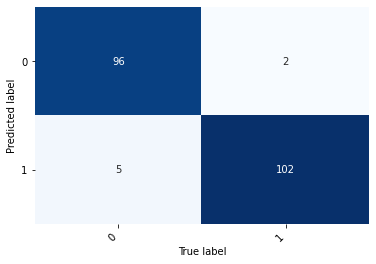

In [39]:
cm = confusion_matrix(y_test, y_pred.round())
heatmap = sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [43]:
print (classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.95      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

